<a href="https://colab.research.google.com/github/SatoshiYoshino/Python/blob/master/PyCaret%E3%82%92%E7%94%A8%E3%81%84%E3%81%9F%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

参考サイト：[PyCaretを用いた機械学習](https://www.youtube.com/watch?v=hsq2WM6vitA&t=960s)

In [9]:
!pip install pycaret #すべてのパッケージをインストールするなら !pip install pycaret[full]
from pycaret.utils import enable_colab
enable_colab()

     |████████████████████████████████| 288 kB 4.2 MB/s 
     |████████████████████████████████| 1.3 MB 40.5 MB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 
     |████████████████████████████████| 2.0 MB 24.3 MB/s 
     |████████████████████████████████| 86 kB 4.9 MB/s 
     |████████████████████████████████| 1.7 MB 18.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 261 kB 38.7 MB/s 
     |████████████████████████████████| 167 kB 63.4 MB/s 
     |████████████████████████████████| 113 kB 54.3 MB/s 
     |████████████████████████████████| 15.5 MB 59.9 MB/s 
     |████████████████████████████████| 6.8 MB 43.5 MB/s 
     |████████████████████████████████| 10.1 MB 46.5 MB/s 
     |████████████████████████████████| 62 kB 836 kB/s 
     |████████████████████████████████| 303 kB 64.1 MB/s 
     |██████████████████

In [10]:
import pandas as pd #まずはpandasモジュールを準備する

In [11]:
df = pd.read_csv('http://logopt.com/data/Advertising.csv', index_col =0)#0行目をインデックスにする．

In [12]:
df.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [13]:
#独立変数（特徴ベクトル）XX は TV, Radio, Newspaperの列，従属変数（ターゲット） yy は Salesの列

手順１： setup(データフレーム）で準備をする． 引数 target でターゲットの列を指定． 引数 session_id で乱数の種を指定．

手順２： compare_modelsでモデルの比較を行う． 引数 fold で交差検証用のデータの分割数を指定． 返値は最良の評価値のモデルインスタンス． （もしくはcreate_modelでモデルを生成する．）

手順３： predict_modelで予測を行う

In [17]:
from pycaret.regression import *   #regressionから回帰関連の関数のインポート
reg = setup(df, target = 'Sales', session_id=123)
# 前処理をしてくれる

,Description,Value
0,session_id,123
1,Target,Sales
2,Original Data,"(200, 4)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(139, 3)"


In [16]:
 best_model = compare_models(fold=5)  #複数の回帰モデルを回して比較をする。compare_modelsという関数を利用する。クロスバリゼーションする時に何分割するか何分割するか指定ができる

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.4636,0.4248,0.6334,0.9837,0.0705,0.0523,0.446
gbr,Gradient Boosting Regressor,0.6601,0.7945,0.8653,0.9704,0.0910,0.0709,0.056
rf,Random Forest Regressor,0.7123,0.8845,0.9210,0.9667,0.0945,0.0750,0.492
ada,AdaBoost Regressor,0.9116,1.3416,1.1366,0.9485,0.1020,0.0903,0.094
dt,Decision Tree Regressor,0.9474,1.4913,1.2042,0.9418,0.1032,0.0836,0.018
lightgbm,Light Gradient Boosting Machine,1.1357,2.4086,1.5262,0.9037,0.1636,0.1345,0.028
knn,K Neighbors Regressor,1.3162,3.1928,1.7806,0.8757,0.1345,0.1183,0.074
lasso,Lasso Regression,1.3792,3.3050,1.8048,0.8697,0.1819,0.1597,0.020
en,Elastic Net,1.3775,3.3151,1.8066,0.8692,0.1830,0.1604,0.020
lr,Linear Regression,1.3750,3.3262,1.8082,0.8686,0.1845,0.1613,0.020


In [18]:
best_model

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

In [23]:
best_model_results = pull() #結果をデータフレームとして得る．

In [26]:
import csv

In [29]:
predict_model(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.3772,0.2647,0.5145,0.9898,0.0328,0.028


,TV,Radio,Newspaper,Sales,Label
0,199.800003,3.100000,34.599998,11.4,11.080
1,80.199997,0.000000,9.200000,8.8,9.137
2,74.699997,49.400002,45.700001,14.7,13.937
3,44.700001,25.799999,20.600000,10.1,9.836
4,147.300003,23.900000,19.100000,14.6,14.633
...,...,...,...,...,...
56,66.099998,5.800000,24.200001,8.6,9.231
57,276.899994,48.900002,41.799999,27.0,25.154
58,120.500000,28.500000,14.200000,14.2,14.470
59,239.300003,15.500000,27.299999,15.7,15.422


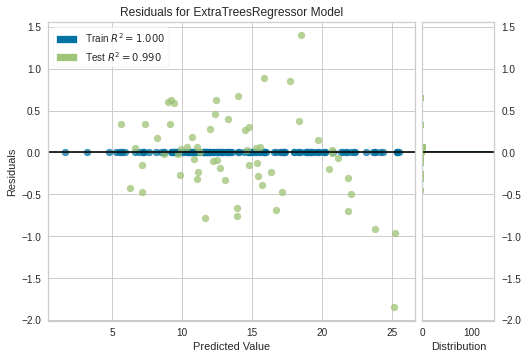

In [30]:
plot_model(best_model)

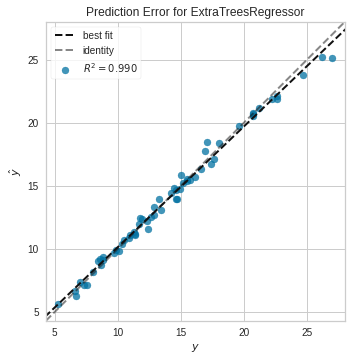

In [31]:
plot_model(best_model, plot = 'error')

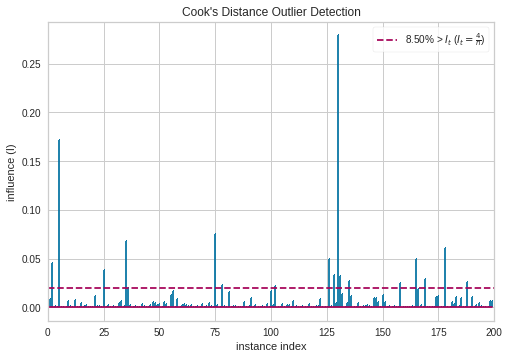

In [32]:
plot_model(best_model, plot = 'cooks')

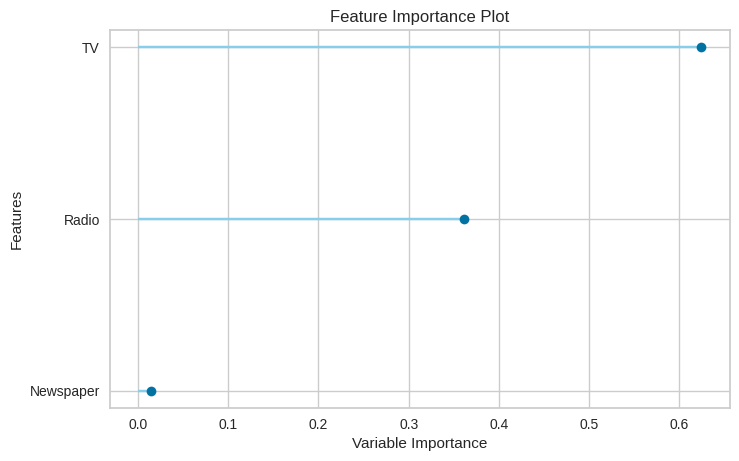

In [33]:
plot_model(best_model, plot = 'feature')

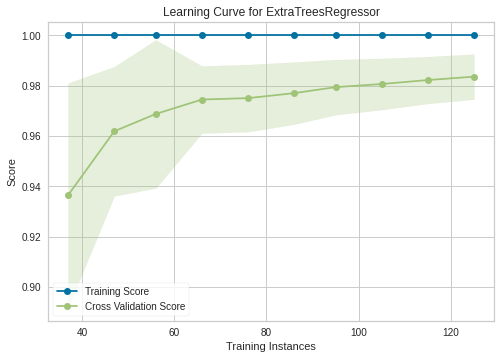

In [34]:
plot_model(best_model, plot = 'learning')

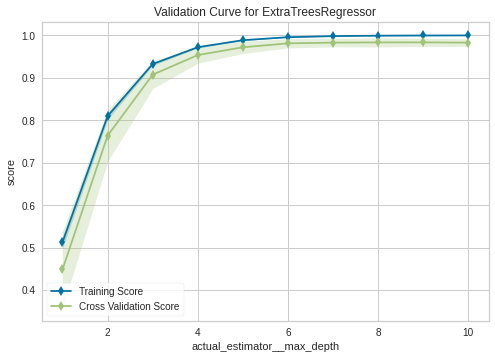

In [35]:
plot_model(best_model, plot = 'vc')

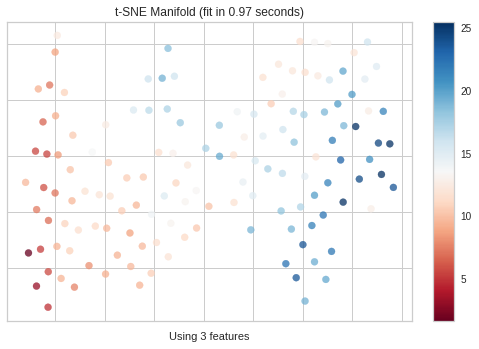

In [36]:
plot_model(best_model, plot = 'manifold')

In [37]:
plot_model(best_model, plot = 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
criterion,mse
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1


小さな（深さ3の）決定木 (dt) のモデルを作って可視化する．

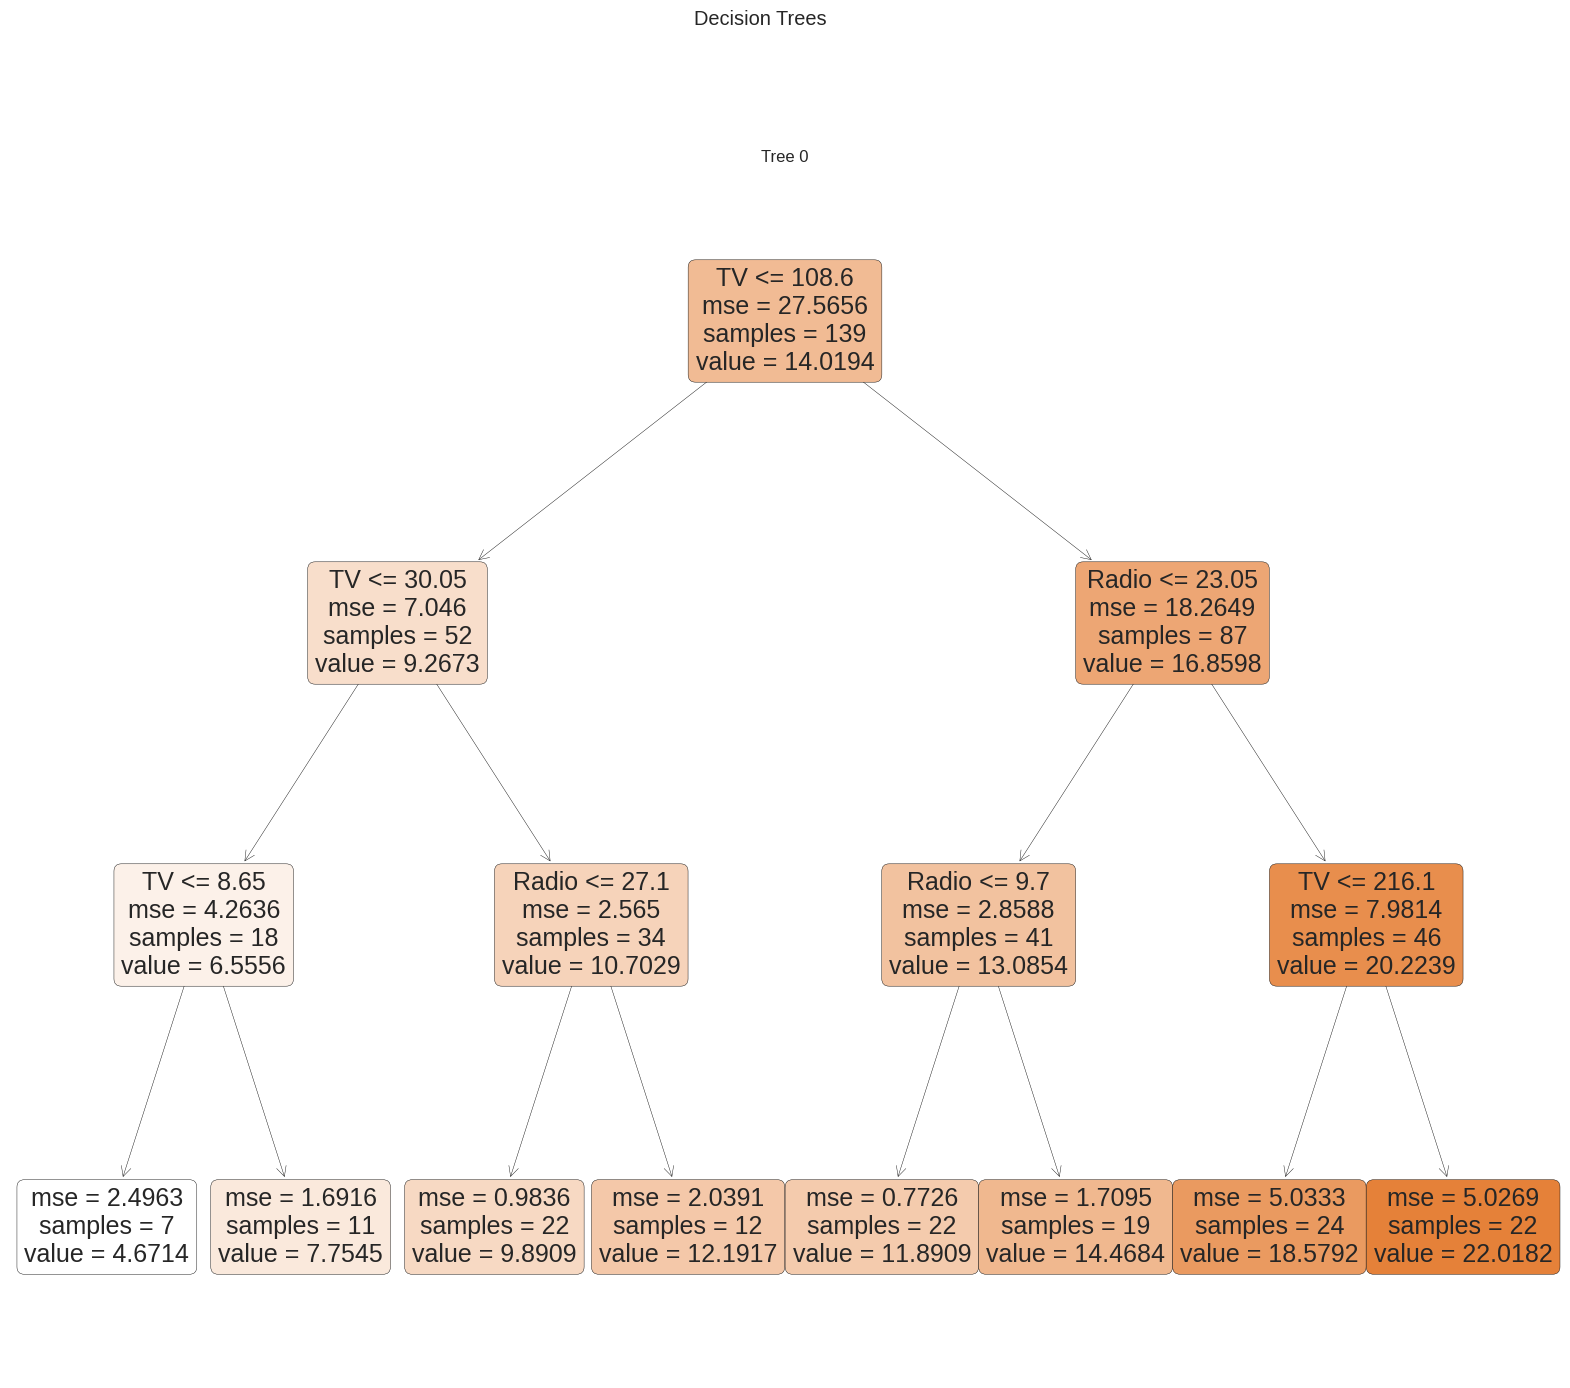

In [39]:
dt = create_model('dt', max_depth=3)
plot_model(dt, plot = 'tree')

### モデルの解釈

interpret_model関数は，SHAP値 (Shapley value)を計算する．

interpret_modelの引数plotの種類

- ‘summary’: 各特徴のSHAP値がターゲットに与える影響を表した図 （既定値）
- ‘correlation’: 特徴とSHAP値の相関図
- ‘reason’: 個々のデータに対するSHAP値


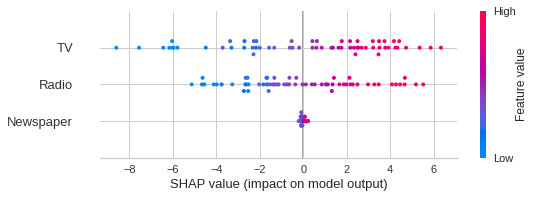

In [46]:
interpret_model(best_model)

In [47]:
# shapについて　https://tsukimitech.com/python_shap_1/
# shapが入っていなかったのでpip install shapでインストールした

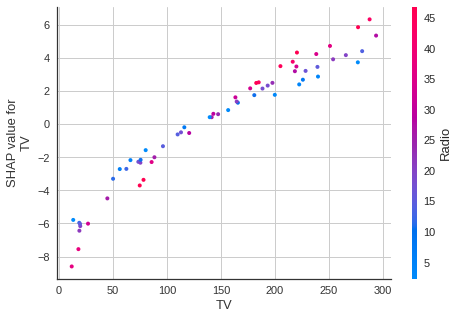

In [48]:
interpret_model(best_model, plot = 'correlation')

In [49]:
interpret_model(best_model, plot = 'reason', observation = 10)